In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
import cv2

seg shape = (230, 230, 113)


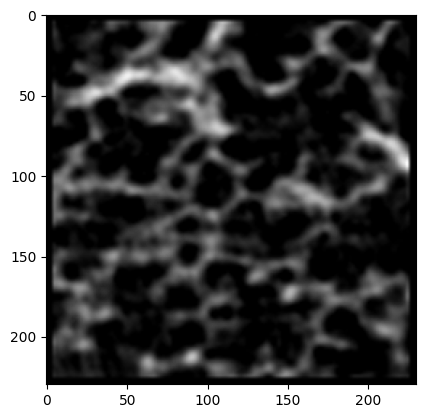

In [6]:
# image_path = "../../raw-data/binary_slices/2018-10-12 pulmon _4.5um_rec0000_voi_0"

# first_path = image_path + str(645) + ".bmp"
# first_slice = cv2.imread(first_path, cv2.IMREAD_GRAYSCALE)
# first_shape = first_slice.shape

# w = 2 # int, shape definer
# final_size = np.around(w*np.array([first_slice.shape[0], first_slice.shape[1]])).astype(np.uint)
# seg = np.zeros((*final_size, 113))
# print(f"seg shape = {seg.shape}")

# l = 0
# for i in range(645, 757+1):
#     path = image_path + str(i) + ".bmp"
#     slice = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
#     # print(final_size)
#     slice = cv2.resize(slice, dsize=final_size, interpolation=cv2.INTER_CUBIC)

#     seg[:,:,l] = slice
#     l += 1

# plt.imshow(slice, cmap='gray')

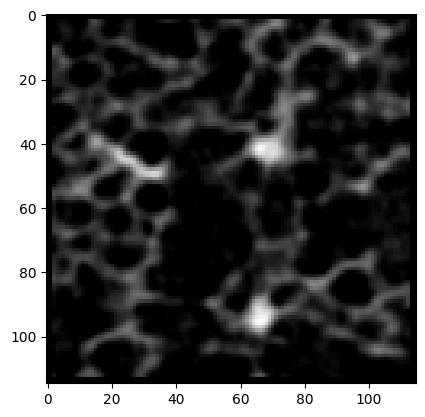

In [40]:
image_path = "../../raw-data/binary_slices/2018-10-12 pulmon _4.5um_rec0000_voi_0"

w = 2 # int, shape definer

slices = np.zeros((115,115,113))

l = 0
for i in range(645, 757+1):
    path = image_path + str(i) + ".bmp"
    slice = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    # print(final_size)
    # slice = cv2.resize(slice, dsize=final_size, interpolation=cv2.INTER_CUBIC)

    slices[:,:,l] = slice
    l += 1

plt.imshow(slices[:,:,0], cmap='gray')

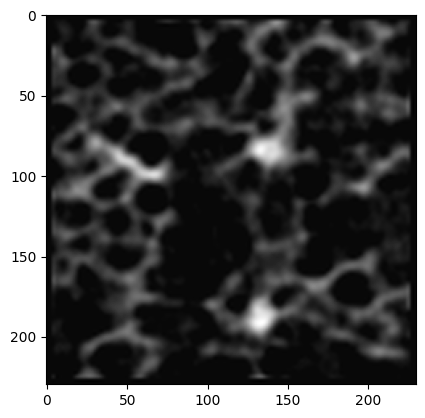

In [43]:
from scipy import ndimage as ndi

seg = ndi.zoom(slices, 2)

plt.imshow(seg[:,:,0], cmap='gray')

In [44]:
seg[:,:,50]

array([[-1.37099659e-17, -7.68731377e-17,  1.01319053e-16, ...,
        -4.76579713e-16, -1.06051294e-15,  1.10958196e-16],
       [-4.82916438e-17,  5.09078285e-02,  1.77070708e-03, ...,
         1.48934024e-02,  4.28185320e-01, -4.84763378e-16],
       [-6.02051371e-17,  1.77070708e-03,  6.15898114e-05, ...,
         5.18031389e-04,  1.48934024e-02,  3.68496042e-16],
       ...,
       [-6.12552243e-18,  3.87330275e-05,  1.34723574e-06, ...,
         3.63150708e-04,  1.04405828e-02, -3.69192322e-16],
       [-1.43662293e-18,  1.11357454e-03,  3.87330275e-05, ...,
         1.04405828e-02,  3.00166757e-01, -5.89448272e-16],
       [-5.34681894e-18, -4.69291802e-18, -6.99936232e-18, ...,
         2.37776670e-16, -4.04856995e-16,  5.34693574e-17]])

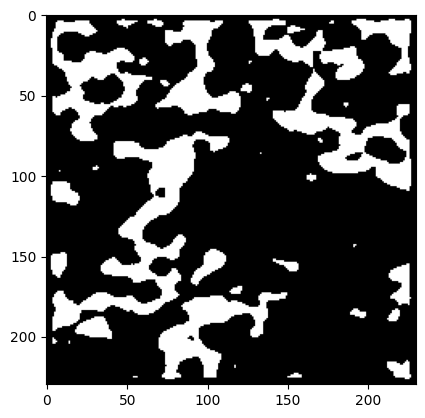

In [45]:
r = (seg>25).astype(np.uint)
plt.imshow(r[:,:,50], cmap='gray')

In [46]:
verts, faces, normals, values = measure.marching_cubes(r[:50,:50,:50], 0, step_size=1, allow_degenerate=False, method='lewiner')

In [47]:
print(verts.shape)
print(faces.shape)

(12889, 3)
(25007, 3)


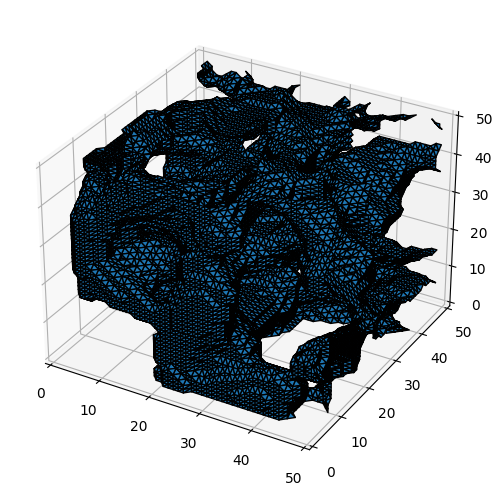

In [49]:
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
mesh = Poly3DCollection(verts[faces])
mesh.set_edgecolor('k')
ax.add_collection3d(mesh)
ax.set_xlim(0, 50)  # a = 6 (times two for 2nd ellipsoid)
ax.set_ylim(0, 50)  # b = 10
ax.set_zlim(0, 50)  # c = 16
plt.tight_layout()
plt.show()